# Created by Pranit Abraham Thomas
## Corpus used is extracted from a transcript from a Formula 1 Race Radio. 
### 1) Tokenization 2) Bag Of Words 3) Annotation - POS Tagging and Named Entity Recognition (NER) 
### 4) Normalization - Stemming and Lemmatization 5) Wordcloud Representation of Tokenized Words 6) Removal of Stop Words

## Downloading and importing necessary dependencies and testing the tokenization with a sample text

In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize   
text = "Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora. Challenges in natural language processing frequently involve natural language understanding, natural language generation (frequently from formal, machine-readable logical forms), connecting language and machine perception, managing human-computer dialog systems, or some combination thereof."  
print(sent_tokenize(text)) 
print(word_tokenize(text))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora.', 'Challenges in natural language processing frequently involve natural language understanding, natural language generation (frequently from formal, machine-readable logical forms), connecting language and machine perception, managing human-computer dialog systems, or some combination thereof.']
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'computer', 'science', ',', 'artificial', 'intelligence', 'and', 'computational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'and', ',', 'in', 'particular', ',', 'concerned', 'with', 'programming', 'computers', 't

## 1) Storing F1 Radio Corpus in 'text' and performing tokenization

In [3]:
import re

text = """<s>And Lando we’ve reported the incident in turn one.</s>
<s>Any thoughts from your side?</s>
<s>Yeah I mean, he’s clearly pushed me out.</s>
<s>He had no intent to make the corner.</s>
<s>Even he went off the track so I just had to avoid crashing into him or him crashing into me but, yeah…</s>
<s>Yeah, I think it’s pretty much what we expected prior to the race.</s>
<s>We’re currently showing P16, out of 17 runners though.</s>
<s>Is this Safety car going to let us past, or…?</s>
<s>It will have to wait until the pack has formed.</s>
<s> But that should be the case.</s>
<s>I’m assuming that once they let us pass they’re not going to let us catch up, right?</s>
<s>Not always, no.</s>
<s>The Safety Car is so slow.</s>
<s> It’s dangerous for us all on these cold tyres.</s>
<s>Okay copy Lewis, we’ll get onto it.</s>
<s>Are they going to let us through or not?</s>
<s>Just as you say that we’re now allowed to overtake.</s>
<s>No point us being in the race if they don’t… the Safety Car doesn’t do its job.</s>
<s>Where are they?</s>
<s>So they’re crossing the start-finish line now.</s>
<s> Lawson’s just crossed the start-finish line and Safety Car will be in this lap.</s>
<s>So you’ve got 25 seconds to Lawson, now.</s>
<s>So Lawson… So go strat mode five.</s>
<s>So George has just pitted, exiting pit lane now.</s>
<s>And we’re going to be target minus one, target minus one.</s>
<s>The car’s slowly beginning to turn, but not much.</s>
<s>Copy, Lewis, yep, starting to see that now.</s>
<s>We’re going to be target plus four, now, target plus four.</s>
<s>Yeah tyres still holding on.</s>
<s>Okay, so you’re in your Safety Car window.</s>
<s>The double yellow keeps flashing up.</s>
<s>So the double yellow keeps flashing up on main straight.</s>
<s>So just look for the boards.</s>
<s>Looks like there’s a wing mirror in the middle of the track around pit exit.</s>
<s>What’s our pace like?</s>
<s>Perez 25.4, Verstappen leading 25.1.</s>
<s>Areas losing, mate?</s>
<s>To Perez it’s turn 15.</s>
<s>To Verstappen it’s primarily turn one mid-speed.</s>
<s>Shit, man. I got a puncture. Left-front.</s>
<s>Okay, copy, copy. Let’s go diff mid 12.</s>
<s>So we’re ready for you. 11 seconds behind to Gasly.</s>
<s>Just trust me to have this luck, man.</s>
<s>Yeah, affirm, Lewis. Four seconds behind to Gasly.</s>
<s>It’s still three down compared to the other, right?</s>
<s>Yeah, copy.</s>
<s>Clutch was on target.</s>
<s>So Hulkenberg car ahead, currently P12.</s>
<s>Stroll car behind at 0.3.</s>
<s>Maybe debris turn one.</s>
<s>So DRS has been enabled and you are the first hard-running car.</s>
<s>Gap to Hulkenberg 0.5.</s>
<s>Stroll 0.8 behind.</s>
<s>Okay Lewis so I guess you are stuck there.</s>
<s>Yes, you’re beached.</s>
<s>Make sure you get a P0 if you have to hop out.</s>
<s>Yeah, sorry guys.</s>
<s>So circuit is all clear at the moment.</s>
<s>Okay mate sorry about that.</s>
<s>If you switch it to P0 and just remember not crossing the track.</s>
<s>Yeah just lower grip compared to yesterday, a bit of understeer.</s>
<s>Brakes cooling now.</s>
<s>Okay. Copy that.</s>
<s>Saving the tyres for now, so…</s>
<s>Check the front-right endplate on the front wing.</s>
<s>Had a small touch with Piastri at the start.</s>
<s>Yeah, from our side we can’t see any performance loss, but we’re still checking.</s>
<s>The pack is not full</s>
<s>We think it should be okay.</s>
<s>So let’s get ready for the restart.</s>
<s>So just remember, recharge off before we get going.</s>
<s>Yeah.</s>
<s>Yeah, yeah.</s>
<s>Okay.</s>
<s>Magnussen 1.2 behind, no DRS.</s>
<s>And if we could do more management six, eight, 17.</s>
<s>If I do more, he’s going to pass me.</s>
<s>Okay.</s>"""

# Extract sentences
sentences = re.findall(r'<s>(.*?)</s>', text)

# Tokenize words
tokenized_sentences = [word_tokenize(sent) for sent in sentences]

print("Extracted Sentences:", sentences)
print("Tokenized Words:", tokenized_sentences)

Extracted Sentences: ['And Lando we’ve reported the incident in turn one.', 'Any thoughts from your side?', 'Yeah I mean, he’s clearly pushed me out.', 'He had no intent to make the corner.', 'Even he went off the track so I just had to avoid crashing into him or him crashing into me but, yeah…', 'Yeah, I think it’s pretty much what we expected prior to the race.', 'We’re currently showing P16, out of 17 runners though.', 'Is this Safety car going to let us past, or…?', 'It will have to wait until the pack has formed.', ' But that should be the case.', 'I’m assuming that once they let us pass they’re not going to let us catch up, right?', 'Not always, no.', 'The Safety Car is so slow.', ' It’s dangerous for us all on these cold tyres.', 'Okay copy Lewis, we’ll get onto it.', 'Are they going to let us through or not?', 'Just as you say that we’re now allowed to overtake.', 'No point us being in the race if they don’t… the Safety Car doesn’t do its job.', 'Where are they?', 'So they’re c

## Beautifying the output in a tabular manner:

In [4]:
from rich.console import Console
from rich.table import Table
from rich.panel import Panel


console = Console()

# Create a table for extracted sentences
table = Table(title="Extracted Sentences", show_lines=True)
table.add_column("Index", justify="right", style="cyan", no_wrap=True)
table.add_column("Sentence", style="bold")

for idx, sentence in enumerate(sentences, start=1):
    table.add_row(str(idx), sentence)

console.print(table)

# Display tokenized words with clear separation
console.print("\n[bold yellow]Tokenized Words:[/bold yellow]")
for idx, words in enumerate(tokenized_sentences, start=1):
    console.print(f"[cyan]Sentence {idx}:[/cyan] {' | '.join(words)}")

# Display raw tokenized words in a panel
tokenized_text = "\n".join([" ".join(words) for words in tokenized_sentences])
console.print(Panel(tokenized_text, title="Tokenized Words (Raw View)", expand=False))


                                               Extracted Sentences                                                
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Index ┃ Sentence                                                                                               ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│     1 │ And Lando we’ve reported the incident in turn one.                                                     │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     2 │ Any thoughts from your side?                                                                           │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     3 │ Yeah I mean, he’s clearly pushed me out.                                                               │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     4 │ He had no intent to make the corner.                                                                   │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     5 │ Even he went off the track so I just had to avoid crashing into him or him crashing into me but, yeah… │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     6 │ Yeah, I think it’s pretty much what we expected prior to the race.                                     │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     7 │ We’re currently showing P16, out of 17 runners though.                                                 │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     8 │ Is this Safety car going to let us past, or…?                                                          │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│     9 │ It will have to wait until the pack has formed.                                                        │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    10 │  But that should be the case.                                                                          │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    11 │ I’m assuming that once they let us pass they’re not going to let us catch up, right?                   │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    12 │ Not always, no.                                                                                        │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    13 │ The Safety Car is so slow.                                                                             │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    14 │  It’s dangerous for us all on these cold tyres.                                                        │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    15 │ Okay copy Lewis, we’ll get onto it.                                                                    │
├───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    16 │ Are they going to let us through or not?                                        

Tokenized Words:

Sentence 1: And | Lando | we | ’ | ve | reported | the | incident | in | turn | one | .

Sentence 2: Any | thoughts | from | your | side | ?

Sentence 3: Yeah | I | mean | , | he | ’ | s | clearly | pushed | me | out | .

Sentence 4: He | had | no | intent | to | make | the | corner | .

Sentence 5: Even | he | went | off | the | track | so | I | just | had | to | avoid | crashing | into | him | or | 
him | crashing | into | me | but | , | yeah…

Sentence 6: Yeah | , | I | think | it | ’ | s | pretty | much | what | we | expected | prior | to | the | race | .

Sentence 7: We | ’ | re | currently | showing | P16 | , | out | of | 17 | runners | though | .

Sentence 8: Is | this | Safety | car | going | to | let | us | past | , | or… | ?

Sentence 9: It | will | have | to | wait | until | the | pack | has | formed | .

Sentence 10: But | that | should | be | the | case | .

Sentence 11: I | ’ | m | assuming | that | once | they | let | us | pass | they | ’ | re | not | going | to | let |
us | catch | up | , | right | ?

Sentence 12: Not | always | , | no | .

Sentence 13: The | Safety | Car | is | so | slow | .

Sentence 14: It | ’ | s | dangerous | for | us | all | on | these | cold | tyres | .

Sentence 15: Okay | copy | Lewis | , | we | ’ | ll | get | onto | it | .

Sentence 16: Are | they | going | to | let | us | through | or | not | ?

Sentence 17: Just | as | you | say | that | we | ’ | re | now | allowed | to | overtake | .

Sentence 18: No | point | us | being | in | the | race | if | they | don | ’ | t… | the | Safety | Car | doesn | ’ 
| t | do | its | job | .

Sentence 19: Where | are | they | ?

Sentence 20: So | they | ’ | re | crossing | the | start-finish | line | now | .

Sentence 21: Lawson | ’ | s | just | crossed | the | start-finish | line | and | Safety | Car | will | be | in | 
this | lap | .

Sentence 22: So | you | ’ | ve | got | 25 | seconds | to | Lawson | , | now | .

Sentence 23: So | Lawson… | So | go | strat | mode | five | .

Sentence 24: So | George | has | just | pitted | , | exiting | pit | lane | now | .

Sentence 25: And | we | ’ | re | going | to | be | target | minus | one | , | target | minus | one | .

Sentence 26: The | car | ’ | s | slowly | beginning | to | turn | , | but | not | much | .

Sentence 27: Copy | , | Lewis | , | yep | , | starting | to | see | that | now | .

Sentence 28: We | ’ | re | going | to | be | target | plus | four | , | now | , | target | plus | four | .

Sentence 29: Yeah | tyres | still | holding | on | .

Sentence 30: Okay | , | so | you | ’ | re | in | your | Safety | Car | window | .

Sentence 31: The | double | yellow | keeps | flashing | up | .

Sentence 32: So | the | double | yellow | keeps | flashing | up | on | main | straight | .

Sentence 33: So | just | look | for | the | boards | .

Sentence 34: Looks | like | there | ’ | s | a | wing | mirror | in | the | middle | of | the | track | around | pit
| exit | .

Sentence 35: What | ’ | s | our | pace | like | ?

Sentence 36: Perez | 25.4 | , | Verstappen | leading | 25.1 | .

Sentence 37: Areas | losing | , | mate | ?

Sentence 38: To | Perez | it | ’ | s | turn | 15 | .

Sentence 39: To | Verstappen | it | ’ | s | primarily | turn | one | mid-speed | .

Sentence 40: Shit | , | man | . | I | got | a | puncture | . | Left-front | .

Sentence 41: Okay | , | copy | , | copy | . | Let | ’ | s | go | diff | mid | 12 | .

Sentence 42: So | we | ’ | re | ready | for | you | . | 11 | seconds | behind | to | Gasly | .

Sentence 43: Just | trust | me | to | have | this | luck | , | man | .

Sentence 44: Yeah | , | affirm | , | Lewis | . | Four | seconds | behind | to | Gasly | .

Sentence 45: It | ’ | s | still | three | down | compared | to | the | other | , | right | ?

Sentence 46: Yeah | , | copy | .

Sentence 47: Clutch | was | on | target | .

Sentence 48: So | Hulkenberg | car | ahead | , | currently | P12 | .

Sentence 49: Stroll | car | behind | at | 0.3 | .

Sentence 50: Maybe | debris | turn | one | .

Sentence 51: So | DRS | has | been | enabled | and | you | are | the | first | hard-running | car | .

Sentence 52: Gap | to | Hulkenberg | 0.5 | .

Sentence 53: Stroll | 0.8 | behind | .

Sentence 54: Okay | Lewis | so | I | guess | you | are | stuck | there | .

Sentence 55: Yes | , | you | ’ | re | beached | .

Sentence 56: Make | sure | you | get | a | P0 | if | you | have | to | hop | out | .

Sentence 57: Yeah | , | sorry | guys | .

Sentence 58: So | circuit | is | all | clear | at | the | moment | .

Sentence 59: Okay | mate | sorry | about | that | .

Sentence 60: If | you | switch | it | to | P0 | and | just | remember | not | crossing | the | track | .

Sentence 61: Yeah | just | lower | grip | compared | to | yesterday | , | a | bit | of | understeer | .

Sentence 62: Brakes | cooling | now | .

Sentence 63: Okay | . | Copy | that | .

Sentence 64: Saving | the | tyres | for | now | , | so…

Sentence 65: Check | the | front-right | endplate | on | the | front | wing | .

Sentence 66: Had | a | small | touch | with | Piastri | at | the | start | .

Sentence 67: Yeah | , | from | our | side | we | can | ’ | t | see | any | performance | loss | , | but | we | ’ | 
re | still | checking | .

Sentence 68: The | pack | is | not | full

Sentence 69: We | think | it | should | be | okay | .

Sentence 70: So | let | ’ | s | get | ready | for | the | restart | .

Sentence 71: So | just | remember | , | recharge | off | before | we | get | going | .

Sentence 72: Yeah | .

Sentence 73: Yeah | , | yeah | .

Sentence 74: Okay | .

Sentence 75: Magnussen | 1.2 | behind | , | no | DRS | .

Sentence 76: And | if | we | could | do | more | management | six | , | eight | , | 17 | .

Sentence 77: If | I | do | more | , | he | ’ | s | going | to | pass | me | .

Sentence 78: Okay | .

╭────────────────────────────────────── Tokenized Words (Raw View) ───────────────────────────────────────╮
│ And Lando we ’ ve reported the incident in turn one .                                                   │
│ Any thoughts from your side ?                                                                           │
│ Yeah I mean , he ’ s clearly pushed me out .                                                            │
│ He had no intent to make the corner .                                                                   │
│ Even he went off the track so I just had to avoid crashing into him or him crashing into me but , yeah… │
│ Yeah , I think it ’ s pretty much what we expected prior to the race .                                  │
│ We ’ re currently showing P16 , out of 17 runners though .                                              │
│ Is this Safety car going to let us past , or… ?                                                         │
│ It will have to wait until the pack has formed .                                                        │
│ But that should be the case .                                                                           │
│ I ’ m assuming that once they let us pass they ’ re not going to let us catch up , right ?              │
│ Not always , no .                                                                                       │
│ The Safety Car is so slow .                                                                             │
│ It ’ s dangerous for us all on these cold tyres .                                                       │
│ Okay copy Lewis , we ’ ll get onto it .                                                                 │
│ Are they going to let us through or not ?                                                               │
│ Just as you say that we ’ re now allowed to overtake .                                                  │
│ No point us being in the race if they don ’ t… the Safety Car doesn ’ t do its job .                    │
│ Where are they ?                                                                                        │
│ So they ’ re crossing the start-finish line now .                                                       │
│ Lawson ’ s just crossed the start-finish line and Safety Car will be in this lap .                      │
│ So you ’ ve got 25 seconds to Lawson , now .                                                            │
│ So Lawson… So go strat mode five .                                                                      │
│ So George has just pitted , exiting pit lane now .                                                      │
│ And we ’ re going to be target minus one , target minus one .                                           │
│ The car ’ s slowly beginning to turn , but not much .                                                   │
│ Copy , Lewis , yep , starting to see that now .                                                         │
│ We ’ re going to be target plus four , now , target plus four .                                         │
│ Yeah tyres still holding on .                                                                           │
│ Okay , so you ’ re in your Safety Car window .                                                          │
│ The double yellow keeps flashing up .                                                                   │
│ So the double yellow keeps flashing up on main straight .                                               │
│ So just look for the boards .                                                                           │
│ Looks like there ’ s a wing mirror in the middle of the track around pit exit .                         │
│ What ’ s our pace like ?                                                                                │
│ Perez 25.4 , Verstappen leading 25.1 .                                                                  │
│ Ar

## 2) Bag of Words (BoW)

In [5]:
#BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)

print("BoW Matrix:\n", X.toarray())
print("Feature Names:", vectorizer.get_feature_names_out())

BoW Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature Names: ['11' '12' '15' '17' '25' 'about' 'affirm' 'ahead' 'all' 'allowed'
 'always' 'and' 'any' 'are' 'areas' 'around' 'as' 'assuming' 'at' 'avoid'
 'be' 'beached' 'been' 'before' 'beginning' 'behind' 'being' 'bit'
 'boards' 'brakes' 'but' 'can' 'car' 'case' 'catch' 'check' 'checking'
 'circuit' 'clear' 'clearly' 'clutch' 'cold' 'compared' 'cooling' 'copy'
 'corner' 'could' 'crashing' 'crossed' 'crossing' 'currently' 'dangerous'
 'debris' 'diff' 'do' 'doesn' 'don' 'double' 'down' 'drs' 'eight'
 'enabled' 'endplate' 'even' 'exit' 'exiting' 'expected' 'finish' 'first'
 'five' 'flashing' 'for' 'formed' 'four' 'from' 'front' 'full' 'gap'
 'gasly' 'george' 'get' 'go' 'going' 'got' 'grip' 'guess' 'guys' 'had'
 'hard' 'has' 'have' 'he' 'him' 'holding' 'hop' 'hulkenberg' 'if' 'in'
 'incident' 'intent' 'into' 'is' 'it' 'its' 'job' 'just' 'keeps' 'lando'
 '

## 3) Annotation - POS Tagging and Named Entity Recognition (NER)

In [6]:
#Annotation
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker_tab')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk import pos_tag, ne_chunk

# POS Tagging
tagged_sentences = [pos_tag(word_tokenize(sent)) for sent in sentences]

# Named Entity Recognition
ner_sentences = [ne_chunk(tagged) for tagged in tagged_sentences]

print("POS Tags:", tagged_sentences)
print("Named Entities:", ner_sentences)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


POS Tags: [[('And', 'CC'), ('Lando', 'NNP'), ('we', 'PRP'), ('’', 'VBP'), ('ve', 'RB'), ('reported', 'VBN'), ('the', 'DT'), ('incident', 'NN'), ('in', 'IN'), ('turn', 'NN'), ('one', 'CD'), ('.', '.')], [('Any', 'DT'), ('thoughts', 'NNS'), ('from', 'IN'), ('your', 'PRP$'), ('side', 'NN'), ('?', '.')], [('Yeah', 'NN'), ('I', 'PRP'), ('mean', 'VBP'), (',', ','), ('he', 'PRP'), ('’', 'VBZ'), ('s', 'JJ'), ('clearly', 'RB'), ('pushed', 'VBN'), ('me', 'PRP'), ('out', 'IN'), ('.', '.')], [('He', 'PRP'), ('had', 'VBD'), ('no', 'DT'), ('intent', 'NN'), ('to', 'TO'), ('make', 'VB'), ('the', 'DT'), ('corner', 'NN'), ('.', '.')], [('Even', 'RB'), ('he', 'PRP'), ('went', 'VBD'), ('off', 'IN'), ('the', 'DT'), ('track', 'NN'), ('so', 'IN'), ('I', 'PRP'), ('just', 'RB'), ('had', 'VBD'), ('to', 'TO'), ('avoid', 'VB'), ('crashing', 'VBG'), ('into', 'IN'), ('him', 'PRP'), ('or', 'CC'), ('him', 'PRP'), ('crashing', 'VBG'), ('into', 'IN'), ('me', 'PRP'), ('but', 'CC'), (',', ','), ('yeah…', 'RB')], [('Yeah'

## Beautifying the output:

In [7]:
# Beautifying and displaying the output
print("\nPOS Tags:")
for sentence in tagged_sentences:
    print(" ".join([f"{word}/{tag}" for word, tag in sentence]))

print("\nNamed Entities:")
for sentence in ner_sentences:
    entities = []
    for chunk in sentence:
        if isinstance(chunk, nltk.Tree):  # If it's a named entity
            entity = " ".join([word for word, tag in chunk])
            entities.append(f"{entity}/{chunk.label()}")
        else:
            entities.append(f"{chunk[0]}/{chunk[1]}")
    print(" ".join(entities))


POS Tags:
And/CC Lando/NNP we/PRP ’/VBP ve/RB reported/VBN the/DT incident/NN in/IN turn/NN one/CD ./.
Any/DT thoughts/NNS from/IN your/PRP$ side/NN ?/.
Yeah/NN I/PRP mean/VBP ,/, he/PRP ’/VBZ s/JJ clearly/RB pushed/VBN me/PRP out/IN ./.
He/PRP had/VBD no/DT intent/NN to/TO make/VB the/DT corner/NN ./.
Even/RB he/PRP went/VBD off/IN the/DT track/NN so/IN I/PRP just/RB had/VBD to/TO avoid/VB crashing/VBG into/IN him/PRP or/CC him/PRP crashing/VBG into/IN me/PRP but/CC ,/, yeah…/RB
Yeah/UH ,/, I/PRP think/VBP it/PRP ’/VBZ s/JJ pretty/RB much/JJ what/WP we/PRP expected/VBD prior/RB to/TO the/DT race/NN ./.
We/PRP ’/VBP re/RB currently/RB showing/VBG P16/NNP ,/, out/IN of/IN 17/CD runners/NNS though/IN ./.
Is/VBZ this/DT Safety/NN car/NN going/VBG to/TO let/VB us/PRP past/VB ,/, or…/VB ?/.
It/PRP will/MD have/VB to/TO wait/VB until/IN the/DT pack/NN has/VBZ formed/VBN ./.
But/CC that/DT should/MD be/VB the/DT case/NN ./.
I/PRP ’/VBP m/JJ assuming/VBG that/DT once/RB they/PRP let/VBP us/PR

## 4) Normalization - Stemming and Lemmatization

In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
#Initialize the Stemmer and Lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
#Stemming
stemmed_sentences = []
for sent in tokenized_sentences:
    stemmed_sentences.append([stemmer.stem(word) for word in sent])

#Perform Lemmatization
# Mapping POS tags to WordNet POS tag format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('V'):
        return wordnet.VERB  # Verb
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN  # Noun
    elif treebank_tag.startswith('R'):
        return wordnet.ADV  # Adverb
    else:
        return wordnet.NOUN  # Default to noun

# Lemmatizing based on the POS tags
lemmatized_sentences = []
for sentence in tagged_sentences:
    lemmatized_sentence = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in sentence
    ]
    lemmatized_sentences.append(lemmatized_sentence)

# Beautify the output
def beautify_output(label, sentences):
    print(f"\n{label}")
    print("-" * len(label))
    for i, sentence in enumerate(sentences):
        print(f"Sentence {i+1}: {' '.join(sentence)}")
    print("\n")

In [11]:
beautify_output("Stemmed Sentences", stemmed_sentences)
beautify_output("Lemmatized Sentences", lemmatized_sentences)


Stemmed Sentences
-----------------
Sentence 1: and lando we ’ ve report the incid in turn one .
Sentence 2: ani thought from your side ?
Sentence 3: yeah i mean , he ’ s clearli push me out .
Sentence 4: he had no intent to make the corner .
Sentence 5: even he went off the track so i just had to avoid crash into him or him crash into me but , yeah…
Sentence 6: yeah , i think it ’ s pretti much what we expect prior to the race .
Sentence 7: we ’ re current show p16 , out of 17 runner though .
Sentence 8: is thi safeti car go to let us past , or… ?
Sentence 9: it will have to wait until the pack ha form .
Sentence 10: but that should be the case .
Sentence 11: i ’ m assum that onc they let us pass they ’ re not go to let us catch up , right ?
Sentence 12: not alway , no .
Sentence 13: the safeti car is so slow .
Sentence 14: it ’ s danger for us all on these cold tyre .
Sentence 15: okay copi lewi , we ’ ll get onto it .
Sentence 16: are they go to let us through or not ?
Sentence 17:

## 5) Wordcloud Representation of Tokenized Words

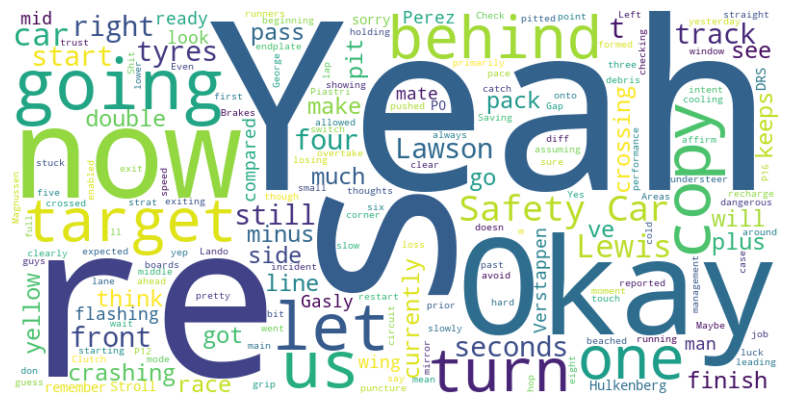

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_tokens = [word for sentence in tokenized_sentences for word in sentence]

text_for_wordcloud = " ".join(all_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

## 6) Removal of Stop Words

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# Load English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from tokenized sentences
filtered_sentences = [[word for word in sentence if word.lower() not in stop_words] for sentence in tokenized_sentences]

beautify_output("Original Tokenized Sentences", tokenized_sentences)
beautify_output("Filtered Sentences (Without Stop Words)", filtered_sentences)


Original Tokenized Sentences
----------------------------
Sentence 1: And Lando we ’ ve reported the incident in turn one .
Sentence 2: Any thoughts from your side ?
Sentence 3: Yeah I mean , he ’ s clearly pushed me out .
Sentence 4: He had no intent to make the corner .
Sentence 5: Even he went off the track so I just had to avoid crashing into him or him crashing into me but , yeah…
Sentence 6: Yeah , I think it ’ s pretty much what we expected prior to the race .
Sentence 7: We ’ re currently showing P16 , out of 17 runners though .
Sentence 8: Is this Safety car going to let us past , or… ?
Sentence 9: It will have to wait until the pack has formed .
Sentence 10: But that should be the case .
Sentence 11: I ’ m assuming that once they let us pass they ’ re not going to let us catch up , right ?
Sentence 12: Not always , no .
Sentence 13: The Safety Car is so slow .
Sentence 14: It ’ s dangerous for us all on these cold tyres .
Sentence 15: Okay copy Lewis , we ’ ll get onto it .
